# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [2]:
#a)
df['média'] = df.mean(axis=1)
df['evolução'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,média,evolução
0,"7,0","7,9","7,5","1,0"
1,"2,9","5,1","4,0","2,2"
2,"2,3","1,0","1,6","-1,3"
3,"5,5","4,5","5,0","-1,0"
4,"7,2","8,9","8,1","1,7"
5,"4,2","3,4","3,8","-0,8"
6,"9,8","9,8","9,8","0,0"
7,"6,8","7,9","7,4","1,1"
8,"4,8","5,7","5,3","0,9"
9,"3,9","5,7","4,8","1,8"


In [3]:
#b)
corr = np.corrcoef(df.p1,df.p2)
corr[0,1]

0.895736581872804

In [4]:
#c)
corr = np.corrcoef(df.média, df.evolução)
corr[0, 1]

0.1334738541178884

d) A correlação é uma medida estatística que indica a relação entre duas variáveis. No caso do item b, há uma correlação positiva significativa, o que significa que quando a nota de p1 é alta, geralmente a nota de p2 também é alta e vice-versa. Já no item c, estamos comparando a média com a diferença entre as notas de p2 e p1. Uma correlação alta nesse caso indicaria que quanto maior a média, maior seria a diferença entre as notas de p2 e p1. Entretanto, não há uma correlação forte entre essas informações, já que elas não estão diretamente relacionadas.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [5]:
df['soma'] = df.p1+df.p2
df.style.format(precision=1, decimal=',')

,p1,p2,média,evolução,soma
0,"7,0","7,9","7,5","1,0","14,9"
1,"2,9","5,1","4,0","2,2","8,0"
2,"2,3","1,0","1,6","-1,3","3,2"
3,"5,5","4,5","5,0","-1,0","10,0"
4,"7,2","8,9","8,1","1,7","16,1"
5,"4,2","3,4","3,8","-0,8","7,7"
6,"9,8","9,8","9,8","0,0","19,6"
7,"6,8","7,9","7,4","1,1","14,8"
8,"4,8","5,7","5,3","0,9","10,5"
9,"3,9","5,7","4,8","1,8","9,6"


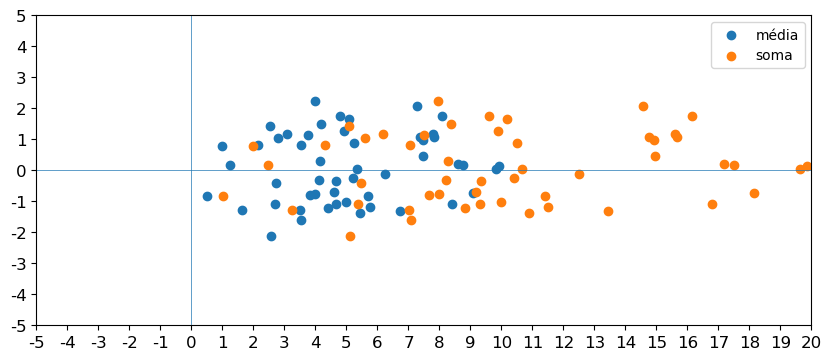

In [6]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -5
xmax = 20
ymin = -5
ymax = 5

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')


#linhas horizontais e verticais
ax.axvline(0, linewidth=.5, linestyle='-')
ax.axhline(0, linewidth=.5, linestyle='-')

# Plotar a média
plt.scatter(df['média'], df['evolução'], label='média')

# Plotar a soma
plt.scatter(df['soma'], df['evolução'], label='soma')

#Legenda
plt.legend()

In [7]:
corr = np.corrcoef(df.soma,df.evolução)
corr[0,1]

0.1334738541178884

- O gráfico de soma é uma representação esticada do gráfico da média, onde a soma é duas vezes maior do que a média. Essencialmente, a soma é uma constante multiplicada pela média, resultando em distribuições de pontos semelhantes. O fato de que o coeficiente de correlação é o mesmo para ambos os gráficos (tanto para o gráfico de soma quanto para o de média) comprova essa distribuição semelhante.